In [2]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

C:\Users\PlayGOD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PlayGOD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PlayGOD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PlayGOD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarnin

In [3]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'yellow leaf':
            label = 0
        elif labels == 'wheat rust':
            label = 1
        elif labels == 'Red rot':
            label = 2
        
        for image_file in os.listdir(directory+labels):#Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(250,250)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            Images.append(image)
            Labels.append(label)
    
    return Images,Labels

def get_classlabel(class_code):
    labels = {2:'Red rot',0:'yellow leaf', 1:'wheat rust'}
    
    return labels[class_code]

In [4]:
Images, Labels = get_images('./Dataset_sugarcane/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (171, 250, 250, 3)
Shape of Labels: (171,)


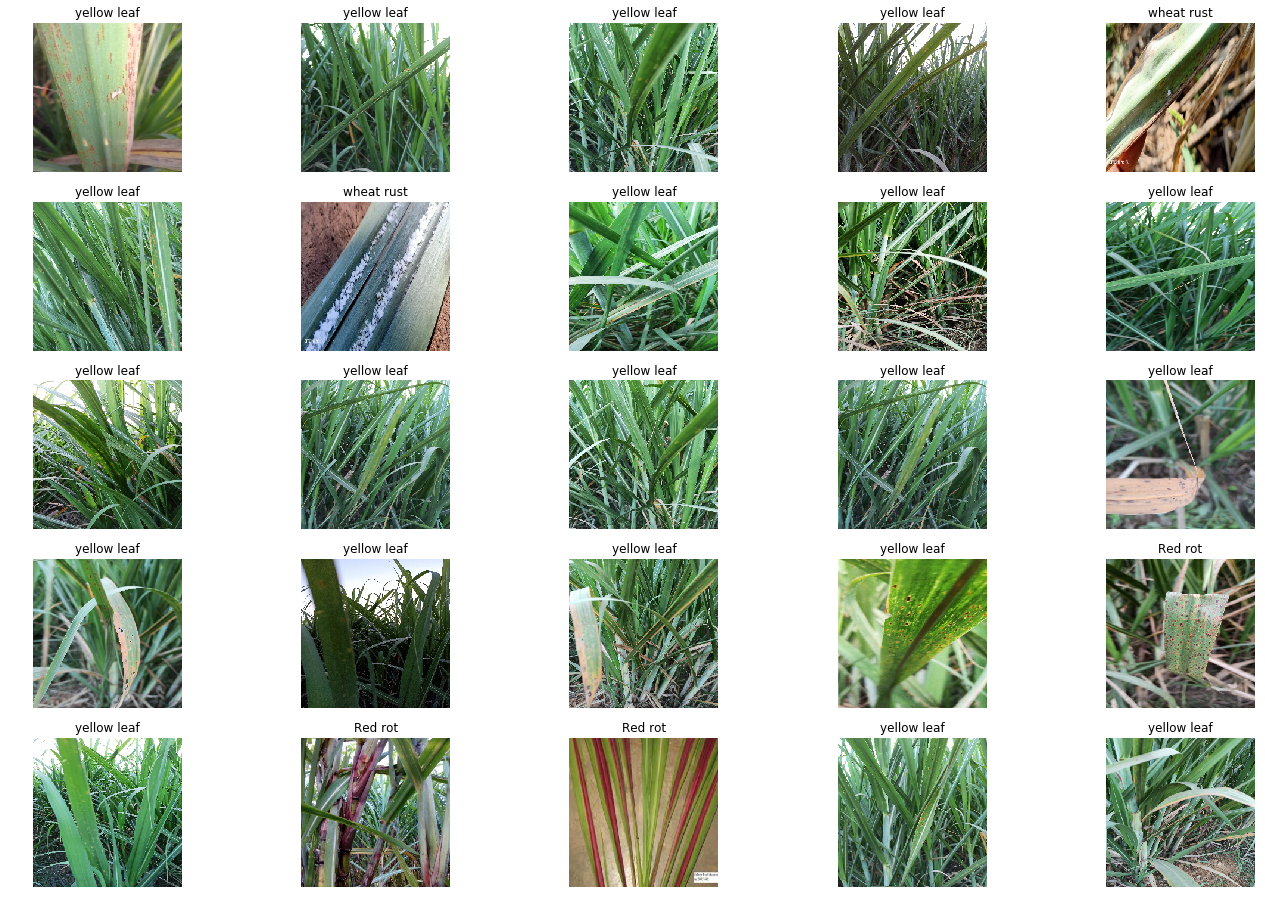

In [6]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [7]:


model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(250,250,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(3,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 246, 246, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 50)        4

In [ ]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Train on 119 samples, validate on 52 samples
Epoch 1/35
119/119 [==============================] - 225s 2s/sample - loss: 4.6903 - accuracy: 0.3361 - val_loss: 0.2106 - val_accuracy: 1.0000
Epoch 2/35
119/119 [==============================] - 190s 2s/sample - loss: 1.0851 - accuracy: 0.5294 - val_loss: 0.2595 - val_accuracy: 1.0000
Epoch 3/35
119/119 [==============================] - 186s 2s/sample - loss: 0.8910 - accuracy: 0.6134 - val_loss: 0.4580 - val_accuracy: 1.0000
Epoch 4/35
119/119 [==============================] - 185s 2s/sample - loss: 0.9315 - accuracy: 0.5630 - val_loss: 0.4200 - val_accuracy: 1.0000
Epoch 5/35
119/119 [==============================] - 156s 1s/sample - loss: 0.9326 - accuracy: 0.5462 - val_loss: 0.2772 - val_accuracy: 1.0000
Epoch 6/35
119/119 [==============================] - 166s 1s/sample - loss: 0.9536 - accuracy: 0.6134 - val_loss: 0.4075 - val_accuracy: 1.0000
Epoch 7/35
119/119 [==============================] - 153s 1s/sample - loss: 0.8715 -

In [ ]:
test_images,test_labels = get_images('./Dataset_sugarcane/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)



In [1]:
model.predict('./Dataset_sugarcane/wheat rust/7.jpg')

NameError: name 'model' is not defined